# Decision Tree

## Fetching Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, spearmanr
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Dictionary
<div class="text_cell_render border-box-sizing rendered_html">
<p><strong> <em>1. Categorical Attributes</em> </strong></p>
<ul>
<li>workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<ul>
<li>Individual work category  </li>
</ul>
</li>
<li>education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<ul>
<li>Individual's highest education degree  </li>
</ul>
</li>
<li>marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<ul>
<li>Individual marital status  </li>
</ul>
</li>
<li>occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<ul>
<li>Individual's occupation  </li>
</ul>
</li>
<li>relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<ul>
<li>Individual's relation in a family   </li>
</ul>
</li>
<li>race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<ul>
<li>Race of Individual   </li>
</ul>
</li>
<li>sex: (categorical) Female, Male.</li>
<li>native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&amp;Tobago, Peru, Hong, Holand-Netherlands.<ul>
<li>Individual's native country   </li>
</ul>
</li>
</ul>
<p><strong> <em>2. Continuous Attributes</em> </strong></p>
<ul>
<li>age: continuous.<ul>
<li>Age of an individual  </li>
</ul>
</li>
<li>education-num: number of education year, continuous.<ul>
<li>Individual's year of receiving education</li>
</ul>
</li>
<li>fnlwgt: final weight, continuous. </li>
<li>The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.</li>
<li>capital-gain: continuous.</li>
<li>capital-loss: continuous.</li>
<li>hours-per-week: continuous.<ul>
<li>Individual's working hour per week   </li>
</ul>
</li>
</ul>
</div>

## Data Cleaning
### Dealing with Missing Values

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

column_names = [ 'age', 'workclass', 'fnlwgt', 'education', 'educational-num', 
                'marital-status', 'occupation', 'relationship', 'race', 
                'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 
                'native-country', 'income' ]

columns_to_encoding = [ 'workclass', 'marital-status', 'occupation',
                        'relationship', 'race', 'gender' ]

columns_to_normalize = [ 'age', 'educational-num', 'hours-per-week', 
                         'capital-gain', 'capital-loss' ]

le = LabelEncoder()
scaler = StandardScaler()
pl = PolynomialFeatures(2, include_bias=False)

def feature_engineering(filename, train=True):
    df = pd.read_csv(filename, index_col=False)        
    df.drop(['fnlwgt', 'education', 'native-country'], axis=1, inplace=True)
    df = pd.get_dummies(df, columns=columns_to_encoding)
    df["income"] = le.fit_transform(df['income'])
    if train:
        X_temp = pl.fit_transform(df[columns_to_normalize])
        X_temp = scaler.fit_transform(X_temp)
        df.drop(columns_to_normalize, axis=1, inplace=True)
        X_train = np.hstack((df.values, X_temp))
        y_train = df['income']
        columns_names = pl.get_feature_names(df.columns)
        return np.hstack((df.columns.values, columns_names)), X_train, y_train
    else:
        X_temp = pl.transform(df[columns_to_normalize])
        X_temp = scaler.transform(X_temp)
        df.drop(columns_to_normalize, axis=1, inplace=True)
        X_test = np.hstack((df.values, X_temp))
        y_test = df['income']
        columns_names = pl.get_feature_names(df.columns)
        return np.hstack((df.columns.values, columns_names)), X_test, y_test

In [3]:
columns_names, X, y = feature_engineering('D:/Fauzan/Study PhD/Semester 1/Machine Learning/Homework/HW4/Adult Dataset/adult.csv', train=True)

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [4]:
from sklearn.model_selection import train_test_split
def rmnan(X, y):
    X_, y_ = [], []    
    for x, yt in zip(X, y):                
        if np.isnan(x).any() or np.isnan(yt).any():
            continue
        X_.append(x)
        y_.append(yt)        
    return np.array(X_), np.array(y_)

X, y = rmnan(X, y)

In [5]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
y.shape, y_test.shape

((34189,), (14653,))

## Find Best number of components to PCA

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold

param_distribution = {
    'max_depth': np.arange(1, 15),
}

scoring = {    
    'Accuracy': make_scorer(accuracy_score),
    'F1_Score': make_scorer(fbeta_score, beta=1, average='micro'),    
}

In [7]:
result = []
kf = RepeatedStratifiedKFold(n_splits=2, n_repeats=2)
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_tr, X_tst = X[train_index], X[test_index]
    y_tr, y_tst = y[train_index], y[test_index]

    for i in range(1, 20):
        # train
        pca = PCA(i)
        X_t = pca.fit_transform(X_tr)
        search_cv = RandomizedSearchCV(DecisionTreeClassifier(), param_distribution,
                                       scoring=scoring, n_jobs=-1, 
                                       cv=RepeatedStratifiedKFold(n_splits=2, n_repeats=2), 
                                       refit='F1_Score') 
        search_cv.fit(X_t, y_tr)
        model = search_cv.best_estimator_        

        # test
        X_t = pca.transform(X_tst)
        y_pred = model.predict(X_t)

        # model evaluation
        f1 = fbeta_score(y_tst, y_pred, beta=1)
        acc = accuracy_score(y_tst, y_pred)
        
        print(f"fold: {fold} - cp:{i} train: {search_cv.best_score_} test: f1={f1}, acc={acc}")

        result.append((fold, i, acc, f1, pca, model))

fold: 0 - cp:1 train: 0.8036445536445536 test: f1=0.5050298877387375, acc=0.8014039192746417
fold: 0 - cp:2 train: 0.8208143208143208 test: f1=0.5613063128735967, acc=0.8239836209417959
fold: 0 - cp:3 train: 0.8265180765180766 test: f1=0.6521685407141975, acc=0.8353319684118163
fold: 0 - cp:4 train: 0.831022581022581 test: f1=0.677609015188633, acc=0.8460368528809593
fold: 0 - cp:5 train: 0.8257868257868258 test: f1=0.6147197839297772, acc=0.8331090962269669
fold: 0 - cp:6 train: 0.8896396396396397 test: f1=0.7925396014307614, acc=0.9050014624159111
fold: 0 - cp:7 train: 0.9212004212004212 test: f1=0.8622562330288817, acc=0.9347177537291605
fold: 0 - cp:8 train: 0.9221656721656722 test: f1=0.8564282141070535, acc=0.9328458613629717
fold: 0 - cp:9 train: 0.9208201708201709 test: f1=0.8554216867469879, acc=0.932611874817198
fold: 0 - cp:10 train: 0.9202059202059202 test: f1=0.853982850751833, acc=0.9312664521789997
fold: 0 - cp:11 train: 0.9601029601029601 test: f1=0.9340472134339255, ac

In [8]:
best_f1 = 0
best_model = None
for fold, n, acc, f1, pca, model in result:
    if best_f1 < f1:
        best_f1 = f1
        best_model=(fold, n, acc, f1, pca, model)
pca_components = best_model[1]

pca_components

15

### Get best model with best pca_components number

In [9]:
result, metrics_ = [], []
kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1)
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # train
    pca = PCA(pca_components)
    X_t = pca.fit_transform(X_train)
    search_cv = RandomizedSearchCV(DecisionTreeClassifier(), param_distribution,
                                   scoring=scoring, n_jobs=-1, 
                                   cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=1), 
                                   refit='F1_Score') 
    search_cv.fit(X_t, y_train)
    model = search_cv.best_estimator_        

    # test
    X_t = pca.transform(X_test)
    y_pred = model.predict(X_t)

    # model evaluation
    f1 = fbeta_score(y_test, y_pred, beta=1)
    acc = accuracy_score(y_test, y_pred)

    print(f"fold: {fold} - cp:{pca_components} train: {search_cv.best_score_} test: f1={f1}, acc={acc}")

    result.append((X_train, y_train, X_test, y_test, fold, i, acc, f1, pca, model))
    metrics_.append((f1, acc))

fold: 0 - cp:15 train: 0.9885927851803705 test: f1=0.9799878714372348, acc=0.9903480549868383
fold: 1 - cp:15 train: 0.9884627884302892 test: f1=0.9775893397940641, acc=0.9891781222579702
fold: 2 - cp:15 train: 0.9887227819304517 test: f1=0.9746376811594203, acc=0.9877157063468851
fold: 3 - cp:15 train: 0.989177770555736 test: f1=0.9774527726995735, acc=0.9891781222579702
fold: 4 - cp:15 train: 0.9896002599935002 test: f1=0.9795427196149218, acc=0.9900555718046212
fold: 5 - cp:15 train: 0.9892752681182971 test: f1=0.9818621523579202, acc=0.9912255045334893
fold: 6 - cp:15 train: 0.9896652583685407 test: f1=0.9787492410443229, acc=0.9897630886224043
fold: 7 - cp:15 train: 0.9908677283067924 test: f1=0.980060422960725, acc=0.9903480549868383
fold: 8 - cp:15 train: 0.9895677608059797 test: f1=0.9746376811594203, acc=0.9877157063468851
fold: 9 - cp:15 train: 0.9881706547329818 test: f1=0.9782608695652175, acc=0.9894675248683441


In [10]:
best_f1 = 0
best_model = None
for X_train, y_train, X_test, y_test, fold, n, acc, f1, pca, model in result:
    if best_f1 < f1:
        best_f1 = f1
        best_model=(X_train, y_train, X_test, y_test, fold, n, acc, f1, pca, model)

X_train, y_train, X_test, y_test = X, y, X_test, y_test #best_model[:4]

## Analyse Model Result

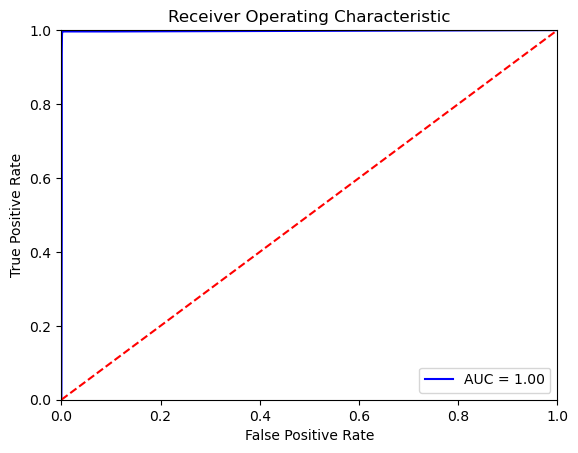

In [11]:
from sklearn import metrics

pca, model = best_model[-2], best_model[-1]
probs = model.predict_proba(pca.transform(X_test))
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

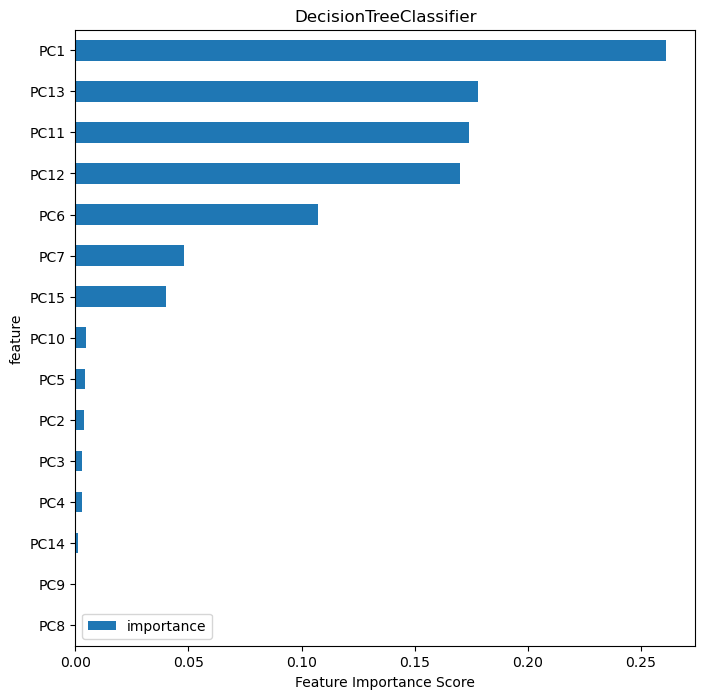

In [12]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
#     https://www.kaggle.com/grfiv4/plotting-feature-importances
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    X_train = pd.DataFrame(data=X_train, columns=[f"PC{i}" for i in range(1, X_train.shape[1] + 1)])
    
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

pca, clf = best_model[-2], best_model[-1]
feature_importance = plot_feature_importances(clf, pca.transform(X_train), top_n=X_train.shape[1], title=clf.__class__.__name__)

In [13]:
# https://stackoverflow.com/questions/22348668/pca-decomposition-with-python-features-relevances
pca, clf = best_model[-2], best_model[-1]
index_components = [int(x[2:]) for x in feature_importance.index.values]
def features_used_to_generate_pca_components(index_components, pca, clf, columns_names):    
    for i in index_components:
        index_features = np.abs(pca.components_[i - 1]).argsort()[:4]
        features = columns_names[index_features]
        print(f'PC{i}')
        print(f'Features:')
        for f in features:
            print("\t" + f)
        print()
        
features_used_to_generate_pca_components(index_components, pca, clf, columns_names)

PC8
Features:
	workclass_Local-gov workclass_Never-worked
	workclass_?^2
	marital-status_Married-AF-spouse
	workclass_? workclass_Never-worked

PC9
Features:
	workclass_Local-gov workclass_Never-worked
	workclass_Never-worked
	workclass_Without-pay
	occupation_Armed-Forces

PC14
Features:
	workclass_Local-gov workclass_Never-worked
	marital-status_Married-AF-spouse
	workclass_Never-worked
	occupation_Armed-Forces

PC4
Features:
	workclass_Local-gov workclass_Never-worked
	workclass_Never-worked
	occupation_Adm-clerical
	occupation_Armed-Forces

PC3
Features:
	workclass_Local-gov workclass_Never-worked
	occupation_Armed-Forces
	marital-status_Married-spouse-absent
	workclass_Without-pay

PC2
Features:
	workclass_Local-gov workclass_Never-worked
	workclass_Never-worked
	occupation_Farming-fishing
	workclass_Without-pay

PC5
Features:
	workclass_Local-gov workclass_Never-worked
	workclass_Never-worked
	occupation_Armed-Forces
	workclass_Without-pay

PC10
Features:
	workclass_Local-gov wor

### Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

pca, clf = best_model[-2], best_model[-1]

y_pred = clf.predict(pca.transform(X_test))

cm = confusion_matrix(y_test, y_pred)
cm

array([[2587,    5],
       [   3,  823]], dtype=int64)

Normalized confusion matrix
[[0.99807099 0.00192901]
 [0.00363196 0.99636804]]


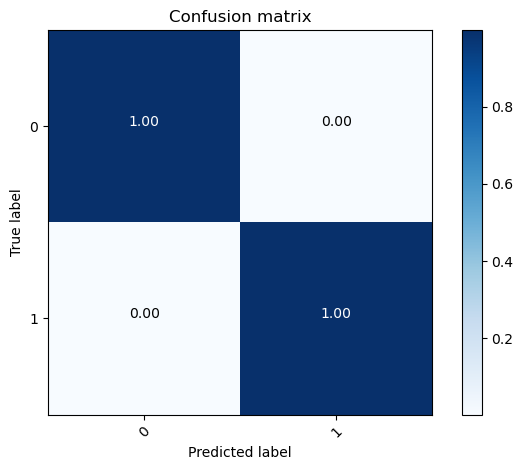

In [15]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
plot_confusion_matrix(cm, [0, 1], True)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2592
           1       0.99      1.00      1.00       826

    accuracy                           1.00      3418
   macro avg       1.00      1.00      1.00      3418
weighted avg       1.00      1.00      1.00      3418



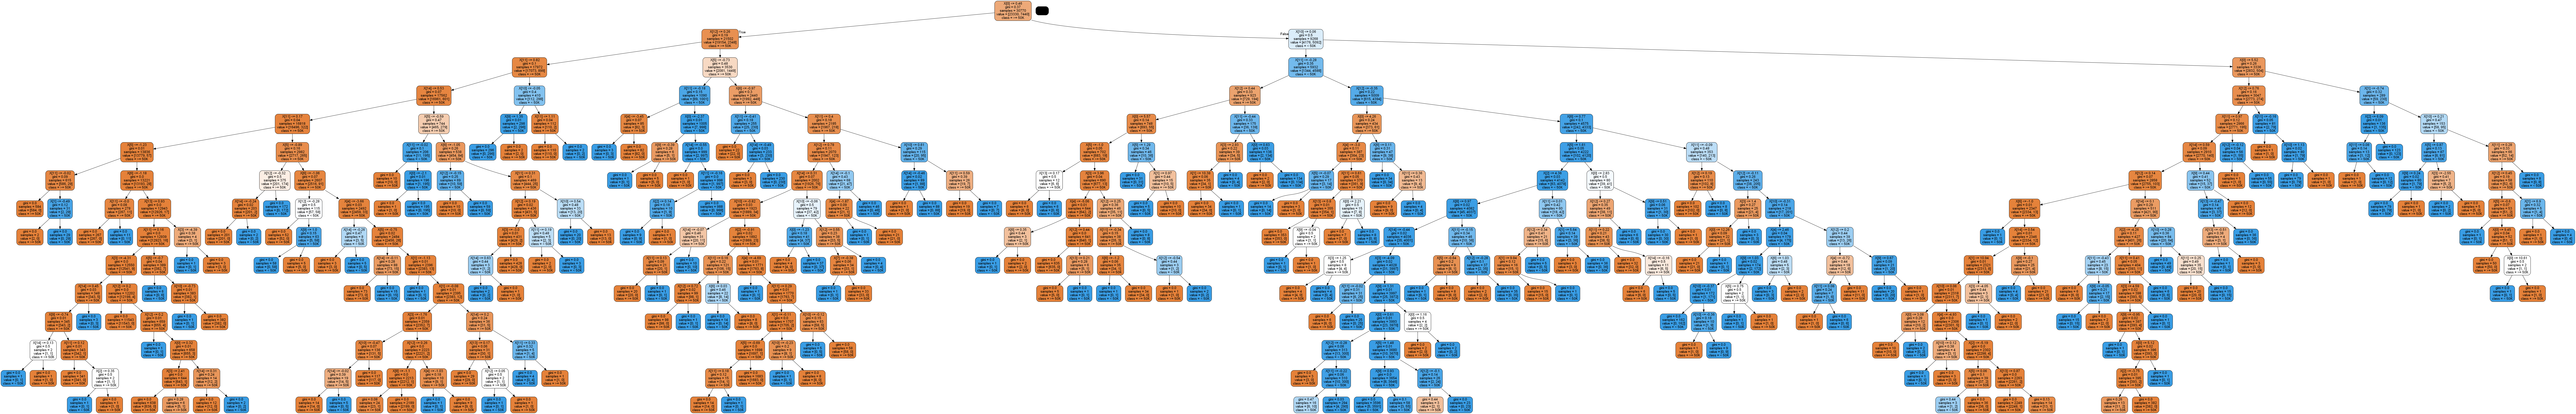

In [17]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(best_model[-1], out_file='tree.dot', 
                #feature_names = iris.feature_names,
                class_names = [">= 50K", "< 50K"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# Support Vector Machine

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
data = pd.read_csv("D:/Fauzan/Study PhD/Semester 1/Machine Learning/Homework/HW4/Adult Dataset/adult.csv")

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [21]:
data.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [22]:
data.shape

(48842, 15)

In [23]:
data.describe().T

count           mean            std      min       25%  \
age              48842.0      38.643585      13.710510     17.0      28.0   
fnlwgt           48842.0  189664.134597  105604.025423  12285.0  117550.5   
educational-num  48842.0      10.078089       2.570973      1.0       9.0   
capital-gain     48842.0    1079.067626    7452.019058      0.0       0.0   
capital-loss     48842.0      87.502314     403.004552      0.0       0.0   
hours-per-week   48842.0      40.422382      12.391444      1.0      40.0   

                      50%       75%        max  
age                  37.0      48.0       90.0  
fnlwgt           178144.5  237642.0  1490400.0  
educational-num      10.0      12.0       16.0  
capital-gain          0.0       0.0    99999.0  
capital-loss          0.0       0.0     4356.0  
hours-per-week       40.0      45.0       99.0

In [24]:
data.describe(include='object')

workclass education      marital-status      occupation relationship  \
count      48842     48842               48842           48842        48842   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       33906     15784               22379            6172        19716   

         race gender native-country income  
count   48842  48842          48842  48842  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    41762  32650          43832  37155

In [25]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

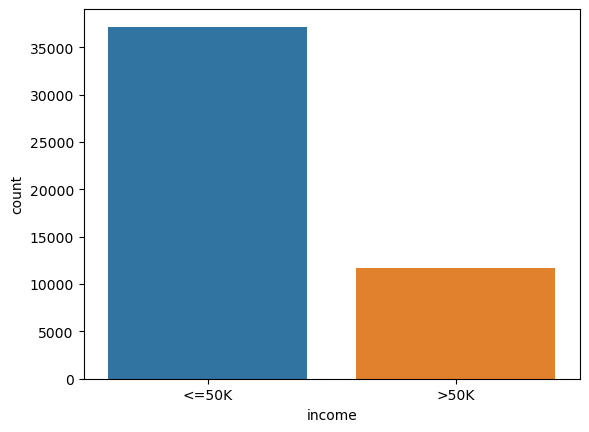

In [26]:
sns.countplot(data.income)

In [27]:
data.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='age'>

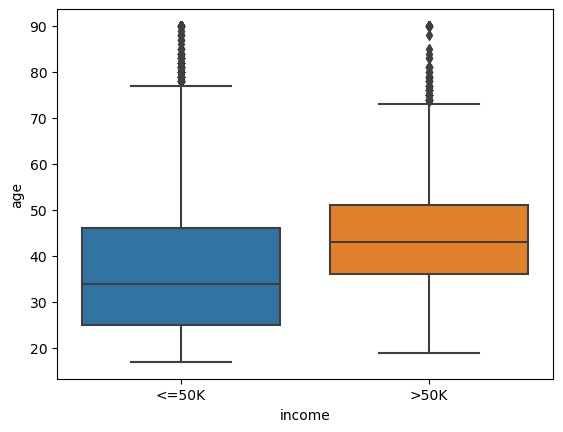

In [28]:
sns.boxplot(data.income,data.age)

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

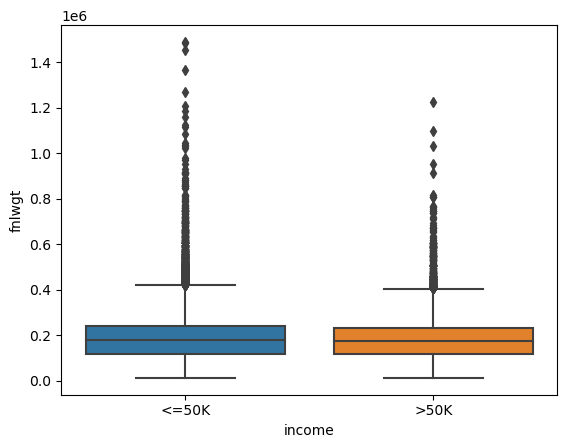

In [29]:
sns.boxplot(data.income,data['fnlwgt'])

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='educational-num'>

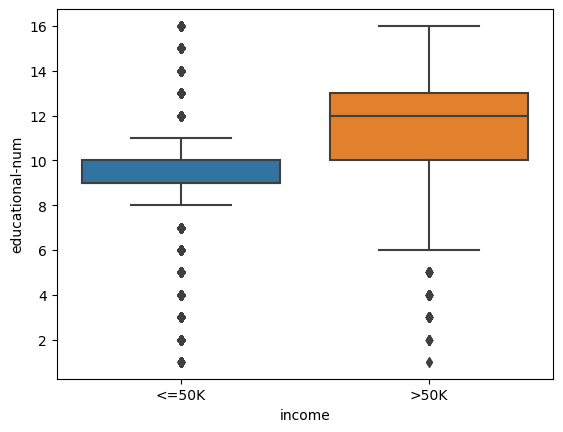

In [30]:
sns.boxplot(data.income,data['educational-num'])

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='capital-gain'>

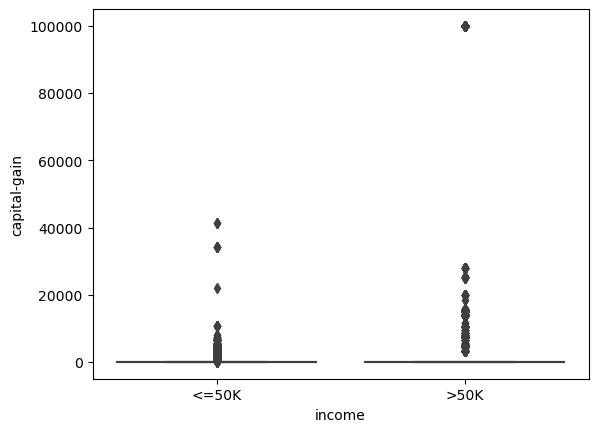

In [31]:
sns.boxplot(data.income,data['capital-gain'])

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='capital-loss'>

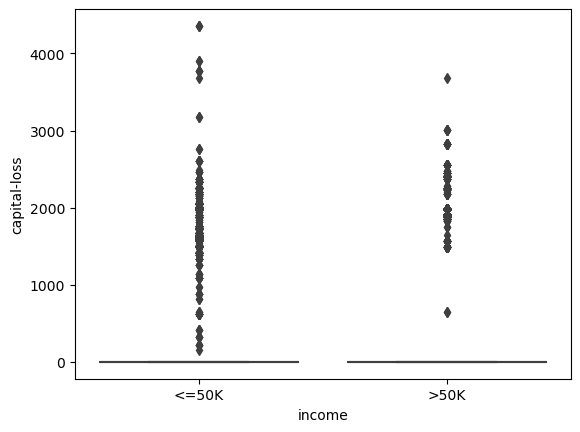

In [32]:
sns.boxplot(data.income,data['capital-loss'])

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

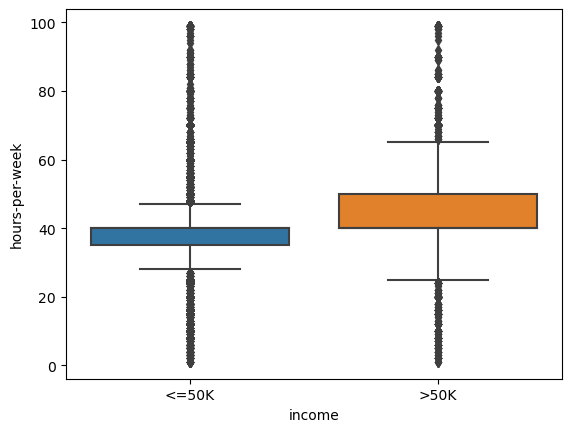

In [33]:
sns.boxplot(data.income,data['hours-per-week'])

In [34]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [35]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [36]:
data=data.dropna()

In [37]:
data.income=data.income.replace(['<=50K', '>50K'],[0,1])

In [38]:
data.income=data.income.replace()

<AxesSubplot:>

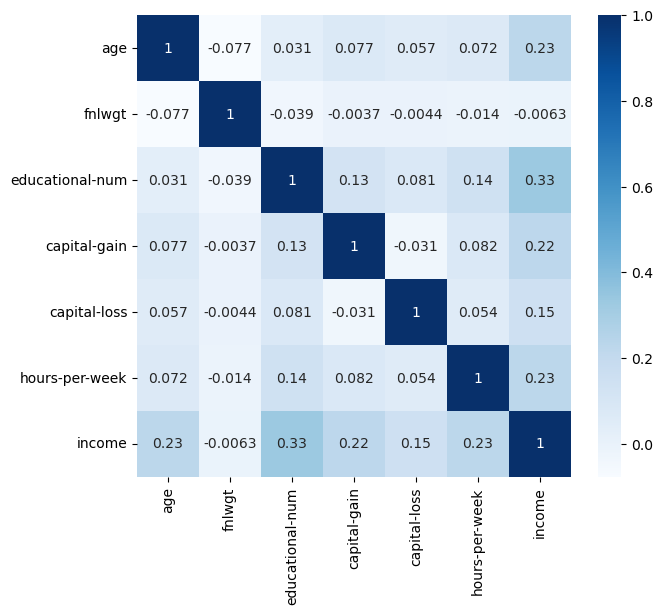

In [39]:
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [40]:
data.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


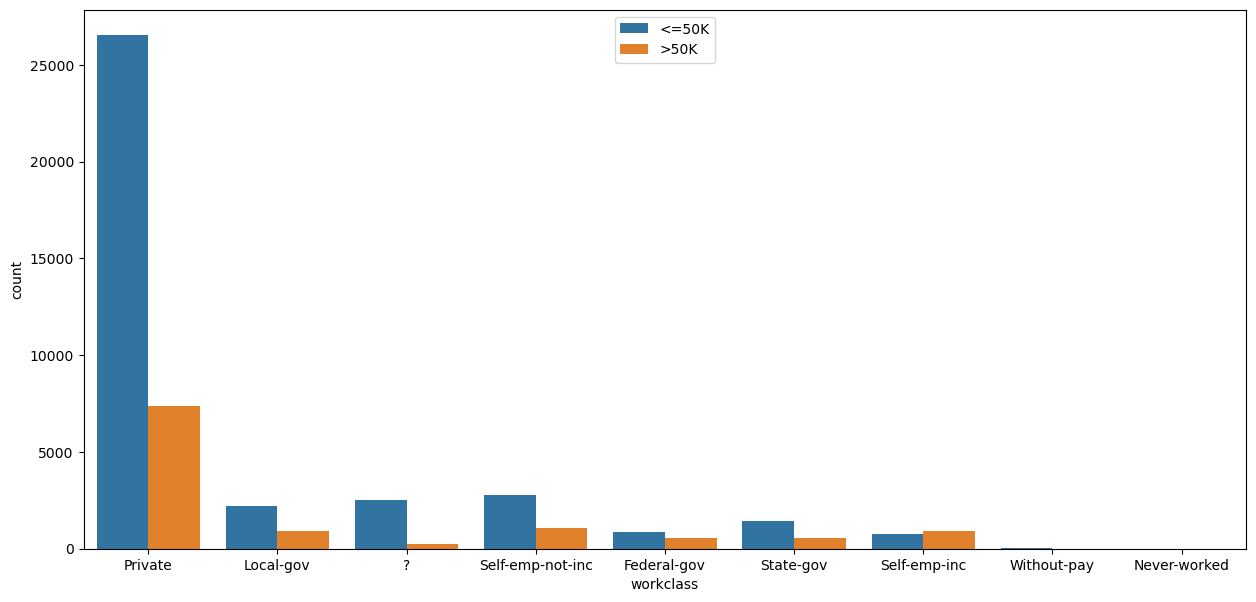

In [41]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.workclass,hue=data.income)
plt.legend(['<=50K', '>50K'])

In [42]:
data.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


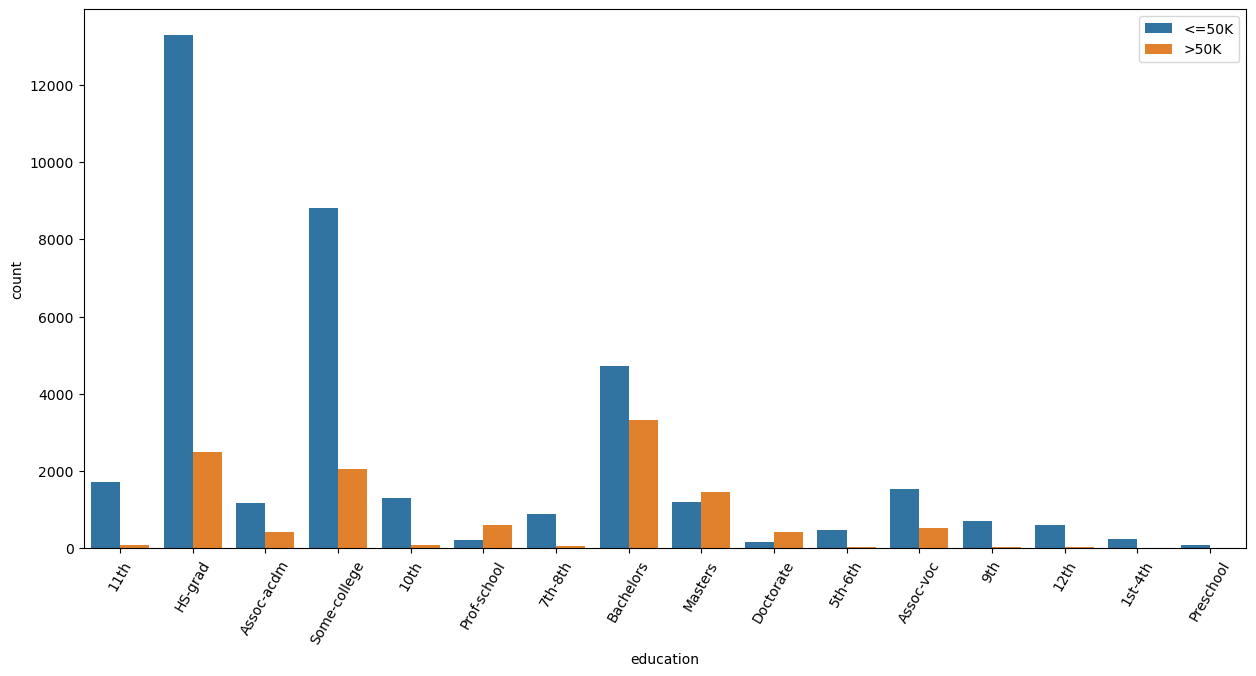

In [43]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.education,hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])

In [44]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


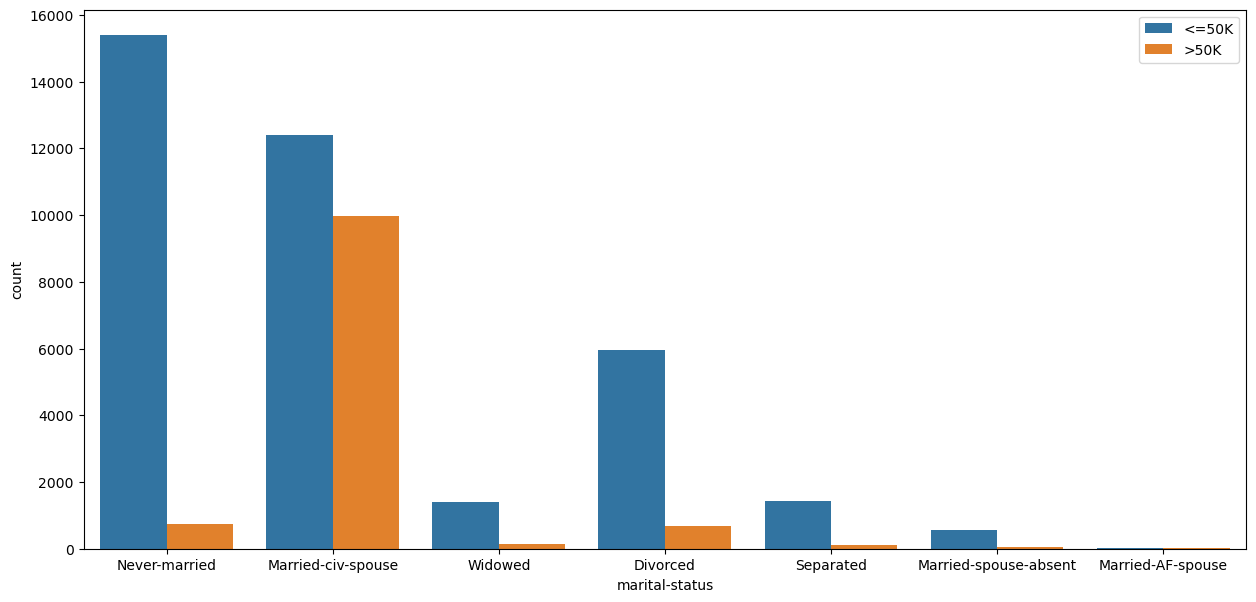

In [45]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data['marital-status'],hue=data.income)
plt.legend(['<=50K', '>50K'])

In [46]:
data.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


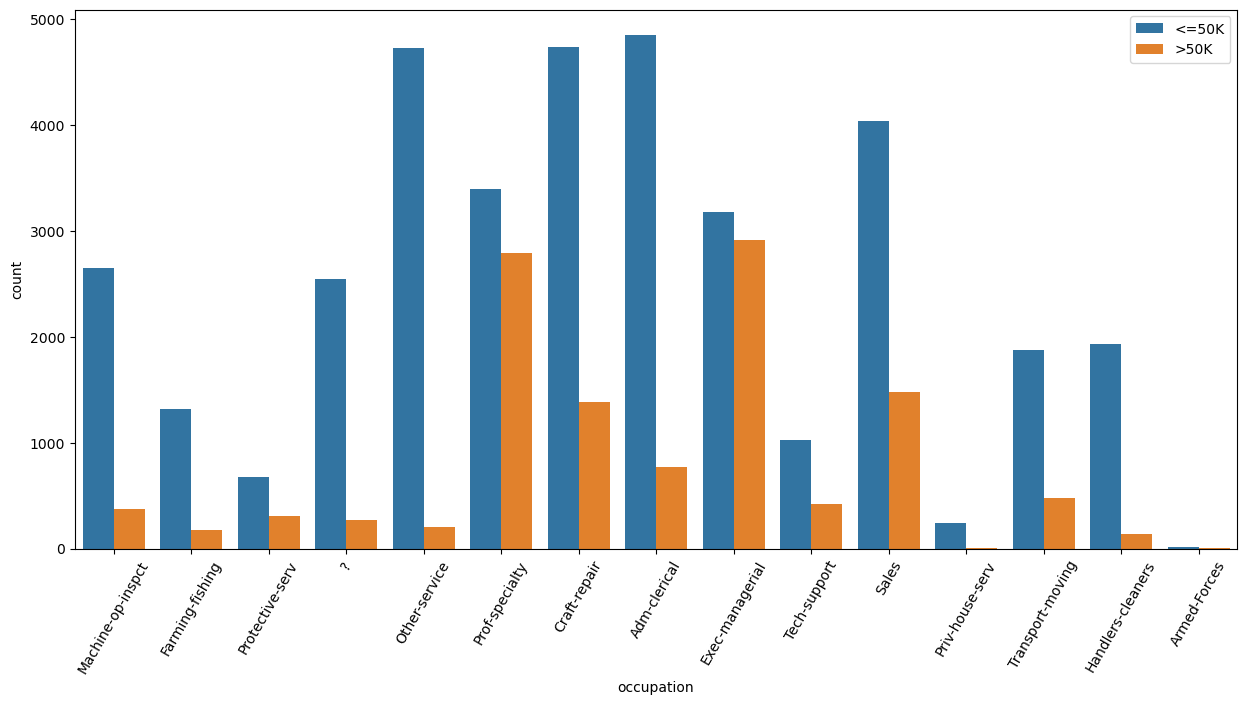

In [47]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.occupation,hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])

In [48]:
data.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


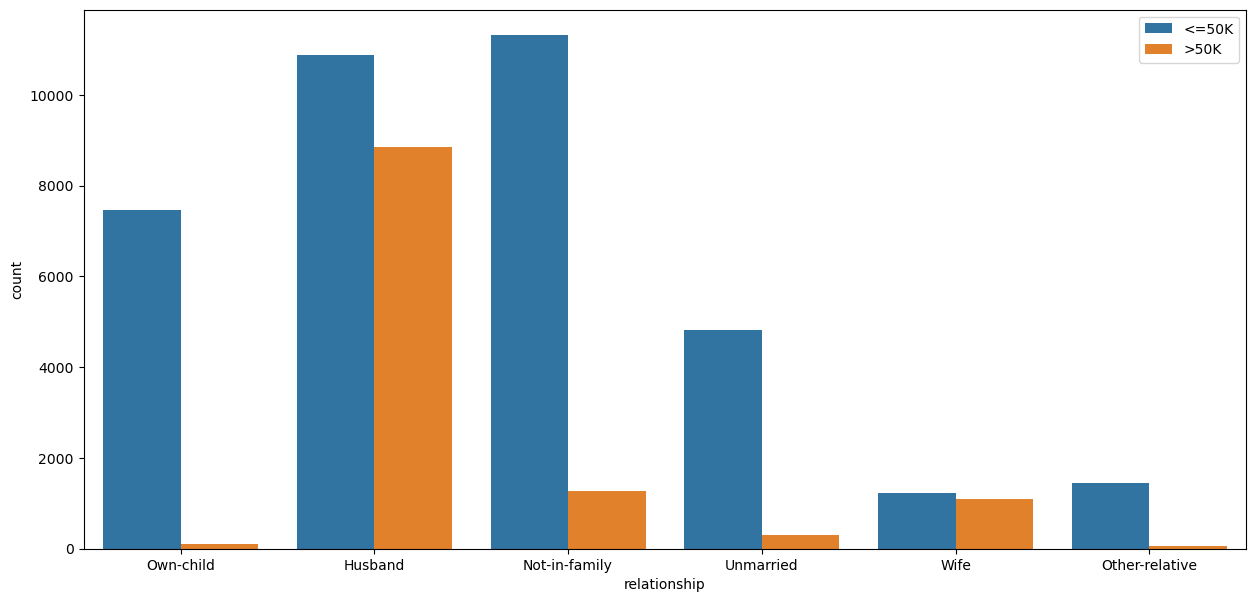

In [49]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.relationship,hue=data.income)
plt.legend(['<=50K', '>50K'])

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


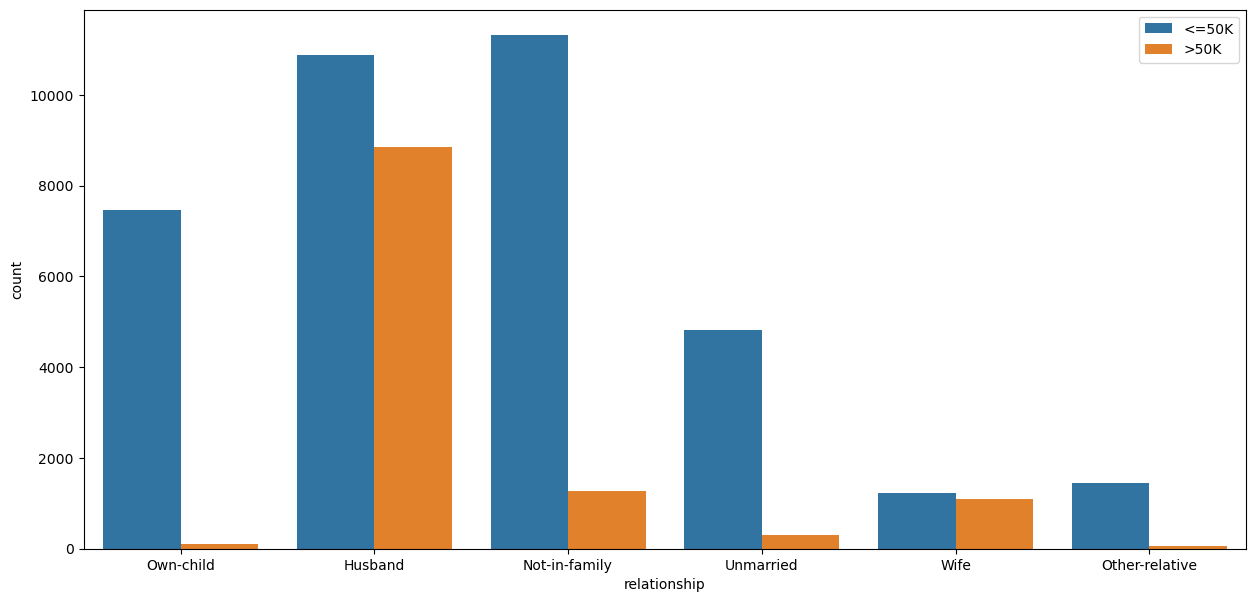

In [50]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.relationship,hue=data.income)
plt.legend(['<=50K', '>50K'])

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


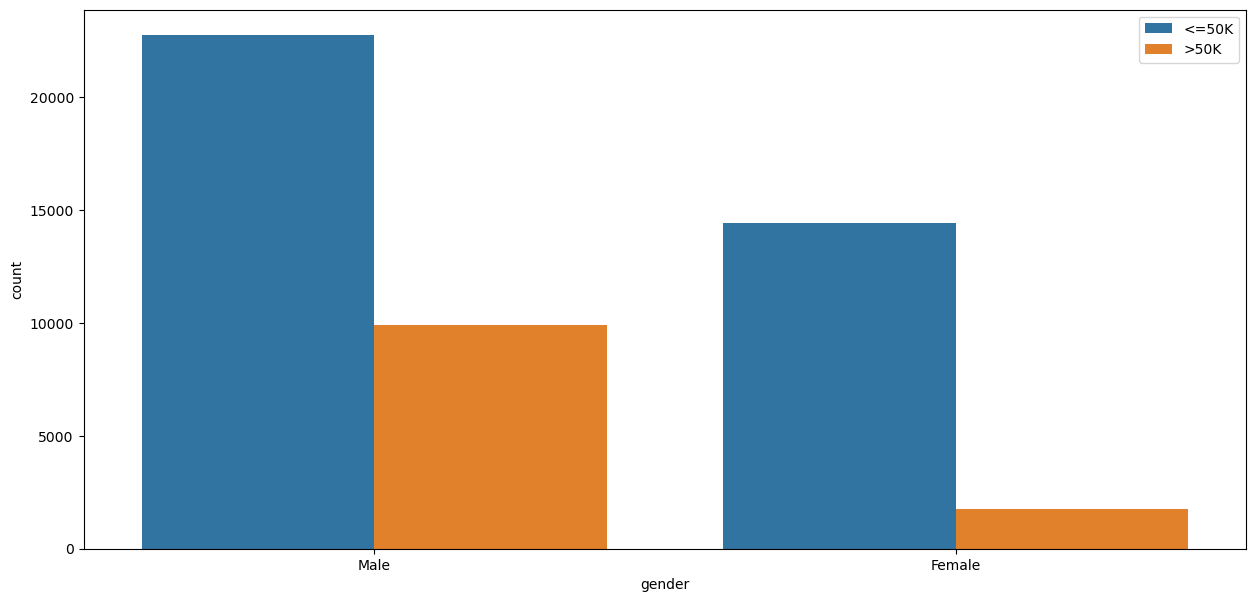

In [51]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.gender,hue=data.income)
plt.legend(['<=50K', '>50K'])

In [52]:
data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


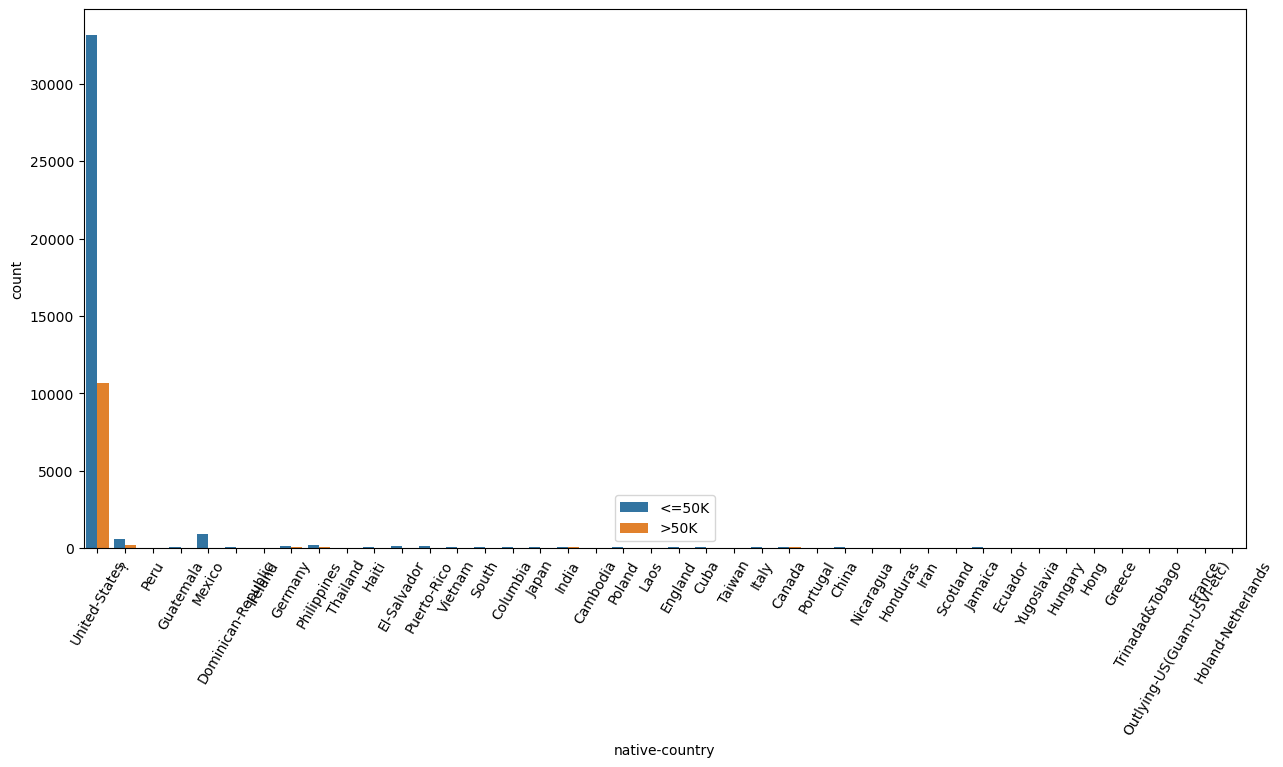

In [53]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data['native-country'],hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])
plt.show()

## Data Preprocessing

In [54]:
x=data.drop(['income'],axis=1)

In [55]:
x.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country  
0              40  United-States  
1              50  United-States  
2              40  United-States  
3              40  United-States  
4              30  United-States

In [56]:
numericalcols=list(data.select_dtypes(exclude='object').columns)
numericalcols.pop()
numericalcols

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [57]:
x=pd.get_dummies(x)

In [58]:
x.head()

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            0                      0                    0   
1            0                      0                    0   
2            0                      0                    1   
3            0                      0                    0   
4            1                      0                    0   

   workclass_Never-worked  ...  native-country_Portugal  \
0                       0  ...                        0   
1                       0  ...                        0   
2                       0  ...                        0   
3                       0  ...                        0   
4                       0  ...                        0   

   native-country_Puerto-Rico  native-country_Scotland  native-country_South  \
0                           0                        0                     0   
1                           0                        0                     0   
2                           0                        0                     0   
3                           0                        0                     0   
4                           0                        0                     0   

   native-country_Taiwan  native-country_Thailand  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                               0                             1   
1                               0                             1   
2                               0                             1   
3                               0                             1   
4                               0                             1   

   native-country_Vietnam  native-country_Yugoslavia  
0                       0                          0  
1                       0                          0  
2                       0                          0  
3                       0                          0  
4                       0                          0  

[5 rows x 108 columns]

In [59]:
data=data.drop(['fnlwgt'],axis=1)

In [60]:
numericalcols

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [61]:
from sklearn.preprocessing import StandardScaler
M = StandardScaler()
x[numericalcols] = M.fit_transform(x[numericalcols])

In [62]:
x.head()

age    fnlwgt  educational-num  capital-gain  capital-loss  \
0 -0.995129  0.351675        -1.197259     -0.144804     -0.217127   
1 -0.046942 -0.945524        -0.419335     -0.144804     -0.217127   
2 -0.776316  1.394723         0.747550     -0.144804     -0.217127   
3  0.390683 -0.277844        -0.030373      0.886874     -0.217127   
4 -1.505691 -0.815954        -0.030373     -0.144804     -0.217127   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0       -0.034087            0                      0                    0   
1        0.772930            0                      0                    0   
2       -0.034087            0                      0                    1   
3       -0.034087            0                      0                    0   
4       -0.841104            1                      0                    0   

   workclass_Never-worked  ...  native-country_Portugal  \
0                       0  ...                        0   
1                       0  ...                        0   
2                       0  ...                        0   
3                       0  ...                        0   
4                       0  ...                        0   

   native-country_Puerto-Rico  native-country_Scotland  native-country_South  \
0                           0                        0                     0   
1                           0                        0                     0   
2                           0                        0                     0   
3                           0                        0                     0   
4                           0                        0                     0   

   native-country_Taiwan  native-country_Thailand  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                               0                             1   
1                               0                             1   
2                               0                             1   
3                               0                             1   
4                               0                             1   

   native-country_Vietnam  native-country_Yugoslavia  
0                       0                          0  
1                       0                          0  
2                       0                          0  
3                       0                          0  
4                       0                          0  

[5 rows x 108 columns]

In [63]:
y=data.income

In [64]:
x_train,x_test,y_trian,y_test=train_test_split(x,y,random_state=89,test_size=0.3)

# Support Vector Machine

### Linear SVM

In [65]:
svc = SVC(gamma=0.22)

In [66]:
svc.fit(x_train,y_trian)
svc.score(x_test,y_test)

0.8599604176619122

In [67]:
y_predict = svc.predict(x_test)

In [68]:
accuracy_score(y_test,y_predict)

0.8599604176619122

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


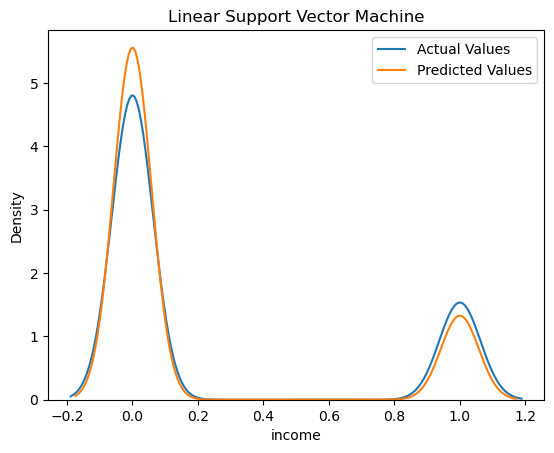

In [69]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_predict,hist=False,label='Predicted Values')
ax.set_title('Linear Support Vector Machine')
plt.legend()

In [70]:
confusion_matrix(y_test,y_predict)

array([[10442,   664],
       [ 1388,  2159]], dtype=int64)

In [96]:
plt.figure(figsize=(7,7))
ax = sns.heatmap(confusion_matrix(y_test,y_predict), annot=True,fmt="d",cmap = 'Pastel1')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
pass

ValueError: Found input variables with inconsistent numbers of samples: [9769, 14653]

<Figure size 700x700 with 0 Axes>

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11106
           1       0.76      0.61      0.68      3547

    accuracy                           0.86     14653
   macro avg       0.82      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653



### Radical Support Vector Machine

In [73]:
svc_radical = SVC(kernel='rbf',C=1,gamma=0.22)

In [74]:
svc_radical.fit(x_train,y_trian)
svc_radical.score(x_test,y_test)

0.8599604176619122

In [75]:
y_pred_radical = svc_radical.predict(x_test)

In [76]:
accuracy_score(y_test,y_pred_radical)

0.8599604176619122

C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\VIPLab\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


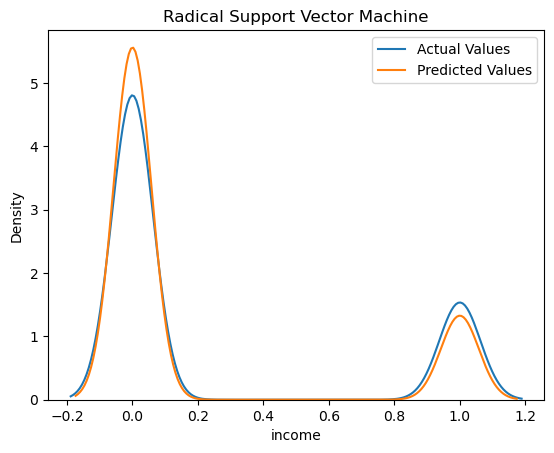

In [77]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_pred_radical,hist=False,label='Predicted Values')
ax.set_title('Radical Support Vector Machine')
plt.legend()

In [78]:
confusion_matrix(y_test,y_pred_radical)

array([[10442,   664],
       [ 1388,  2159]], dtype=int64)

<AxesSubplot:>

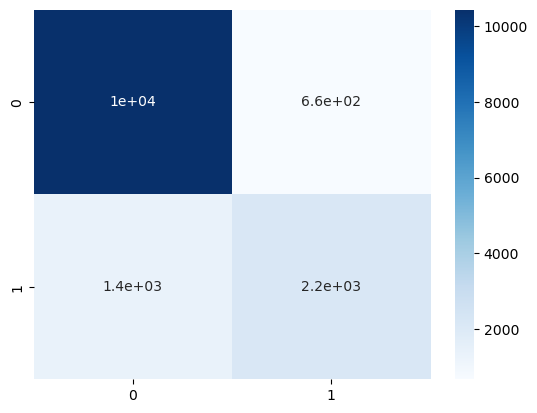

In [79]:
sns.heatmap(confusion_matrix(y_test,y_pred_radical),annot=True,cmap='Blues')

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_radical))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11106
           1       0.76      0.61      0.68      3547

    accuracy                           0.86     14653
   macro avg       0.82      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653



# ANN with Two Layers

In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Load libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Load dataset
data.head()
# Any results you write to the current directory are saved as output.

age  workclass     education  educational-num      marital-status  \
0   25    Private          11th                7       Never-married   
1   38    Private       HS-grad                9  Married-civ-spouse   
2   28  Local-gov    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  Some-college               10  Married-civ-spouse   
4   18          ?  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country  income  
0              40  United-States       0  
1              50  United-States       0  
2              40  United-States       1  
3              40  United-States       1  
4              30  United-States       0

### Preprocessing of the dataset
1) Here looking at the dataset we can see that '?' exists denoting the missing values. We need to replace them with *NaN *using numpy's simple approach and replace them with the most occuring values or even the median of that column. We do not delete such row entries coz it will reduce our dataset by a factor of 0.25.

In [83]:
col_names = data.columns
for c in col_names:
    data[c] = data[c].replace("?", np.NaN)

data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))

2. Now, we need to convert the categorical values to numeric for our Neural Network to train. Looking at the Marital-status col, there are nearly 6 different values which would mean the same as two values of being married ot no married, therefore we convert them into only two values.

In [84]:
data.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
             ['divorced','married','married','married','not married','not married','not married'], inplace = True)

3. Now we use labelEncoder to convert the categorical data into index values of an array of its inputs i.e. converting each value into a number. This is only done on attributes: ['race','marital-status', 'gender', 'income'] which do not contain more than 2 values.

NOTE : we do not want to fit our neural network into a model which contains a biased values for equivalent attribute values. To avoid this, we use Dummy variables method.

4. Here we implement get_dummies method of pandas lib to create new colums for our data where each attribute value's occurance in any input instance is denoted by either 0 or 1.

In [85]:
labelEncoder = preprocessing.LabelEncoder()
category_col = ['race','marital-status','gender', 'income'] 

for col in category_col:
    data[col] = labelEncoder.fit_transform(data[col])

category_col_1 =['workclass', 'education', 'occupation',
               'relationship','native-country'] 
df_2 = pd.get_dummies(data, columns = category_col_1, drop_first=True)

##unknown Attribute is removed and income class label is appended in the end
# data_update = df_2.drop('fnlwgt',1)
data_update = df_2[[c for c in df_2 if c not in ['income']] + ['income']]
data_update.head(20)

age  educational-num  marital-status  race  gender  capital-gain  \
0    25                7               2     2       1             0   
1    38                9               1     4       1             0   
2    28               12               1     4       1             0   
3    44               10               1     2       1          7688   
4    18               10               2     4       0             0   
5    34                6               2     4       1             0   
6    29                9               2     2       1             0   
7    63               15               1     4       1          3103   
8    24               10               2     4       0             0   
9    55                4               1     4       1             0   
10   65                9               1     4       1          6418   
11   36               13               1     4       1             0   
12   26                9               2     4       0             0   
13   58                9               1     4       1             0   
14   48                9               1     4       1          3103   
15   43               14               1     4       1             0   
16   20               10               2     4       1             0   
17   43                9               1     4       0             0   
18   37                9               2     4       0             0   
19   40               16               1     1       1             0   

    capital-loss  hours-per-week  workclass_Local-gov  workclass_Never-worked  \
0              0              40                    0                       0   
1              0              50                    0                       0   
2              0              40                    1                       0   
3              0              40                    0                       0   
4              0              30                    0                       0   
5              0              30                    0                       0   
6              0              40                    0                       0   
7              0              32                    0                       0   
8              0              40                    0                       0   
9              0              10                    0                       0   
10             0              40                    0                       0   
11             0              40                    0                       0   
12             0              39                    0                       0   
13             0              35                    0                       0   
14             0              48                    0                       0   
15             0              50                    0                       0   
16             0              25                    0                       0   
17             0              30                    0                       0   
18             0              20                    0                       0   
19             0              45                    0                       0   

    ...  native-country_Puerto-Rico  native-country_Scotland  \
0   ...                           0                        0   
1   ...                           0                        0   
2   ...                           0                        0   
3   ...                           0                        0   
4   ...                           0                        0   
5   ...                           0                        0   
6   ...                           0                        0   
7   ...                           0                        0   
8   ...                           0                        0   
9   ...                           0                        0   
10  ...                           0                        0   
11  ...              

### Training the Neural Network
1. Now we train and test the data on the model using cross validation method.

2. Also, we Standardize features by removing the mean and scaling to unit variance.[Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance)]

In [86]:
X = data_update.iloc[:, 0:88].values
y = data_update.iloc[:, 88].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

3. I have used a simple model of a neural network where there is one input layer, one output layer and one hidden layer. The inputs are fed into input layer of only 6 neurons or nodes whose output is fed to hidden layer of 6 neurons and which eventually are fed to one node output layer. The first two use Rectified Linear Unit activation function but the Output layer used sigmoid activation function to ensure our network output is between 0 and 1. We run the training model for 100 epochs.

In [87]:
classifier = Sequential()

classifier.add(Dense(6, activation = 'relu', input_dim = 88))
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 534       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________
None


In [88]:
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 25, validation_data=(X_test, y_test))

Epoch 1/25
3908/3908 [==============================] - 8s 2ms/step - loss: 0.3680 - accuracy: 0.8284 - val_loss: 0.3247 - val_accuracy: 0.8527
Epoch 2/25
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3241 - accuracy: 0.8506 - val_loss: 0.3188 - val_accuracy: 0.8502
Epoch 3/25
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3192 - accuracy: 0.8519 - val_loss: 0.3180 - val_accuracy: 0.8512
Epoch 4/25
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3172 - accuracy: 0.8540 - val_loss: 0.3155 - val_accuracy: 0.8534
Epoch 5/25
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3155 - accuracy: 0.8547 - val_loss: 0.3159 - val_accuracy: 0.8530
Epoch 6/25
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3144 - accuracy: 0.8551 - val_loss: 0.3128 - val_accuracy: 0.8561
Epoch 7/25
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3140 - accuracy: 0.8553 - val_loss: 0.3155 - val_accuracy:

In [89]:
test_loss, test_acc = classifier.evaluate(X_test,  y_test, verbose=2)

306/306 - 0s - loss: 0.3150 - accuracy: 0.8542 - 350ms/epoch - 1ms/step


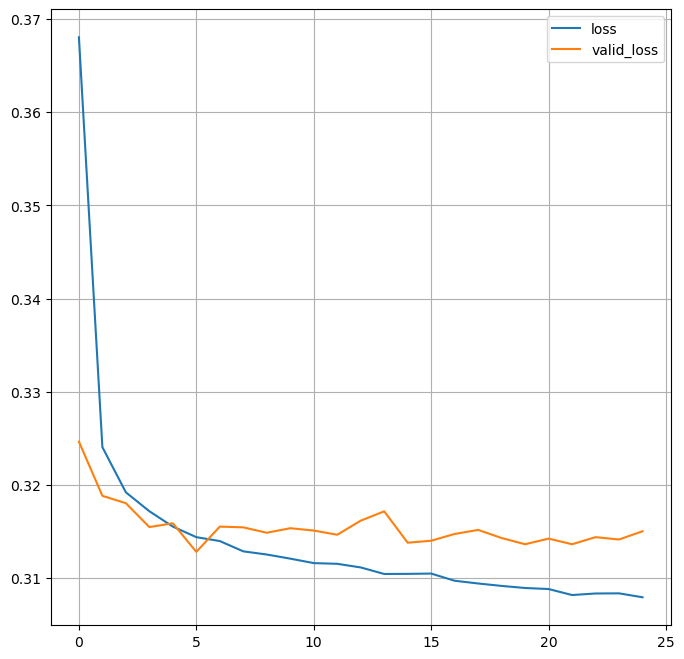

In [90]:
pd.DataFrame({'loss':history.history['loss'],
              'valid_loss':history.history['val_loss'],
              }).plot(figsize=(8, 8))
plt.grid(True)

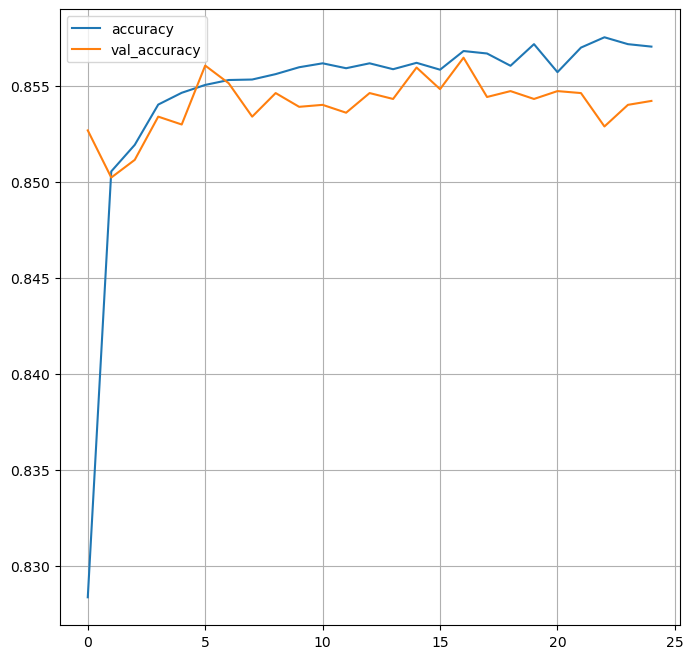

In [91]:
pd.DataFrame({'accuracy':history.history['accuracy'],
              'val_accuracy':history.history['val_accuracy']
              }).plot(figsize=(8, 8))
plt.grid(True)

In [92]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

306/306 [==============================] - 0s 1ms/step


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[6961  489]
 [ 935 1384]]


In [94]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

print('ANN model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ANN model accuracy score: 0.8542


              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7450
           1       0.74      0.60      0.66      2319

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



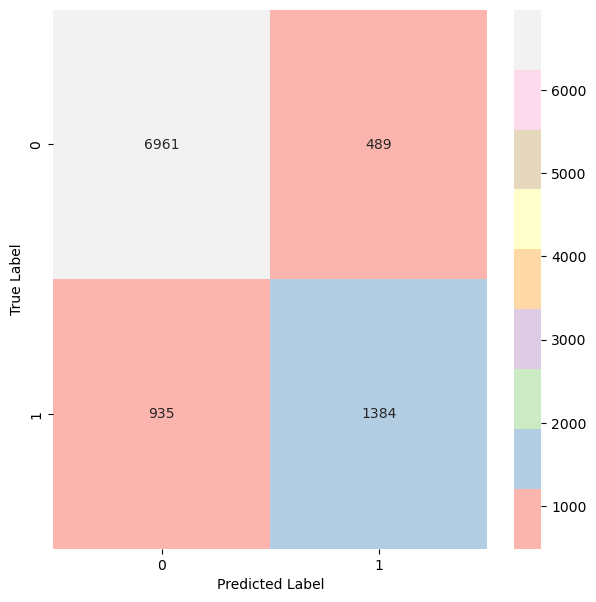

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

plt.figure(figsize=(7,7))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt="d",cmap = 'Pastel1')
ax.set_xlabel('ANN')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
pass

print(classification_report(y_test, y_pred))